In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

from sympy import *
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# NEWTON
-----------------

In [16]:
epsilon = 10e-5

def newtonsUpdate(xk, deriv1, H):
    """
        xk:    : Current value 
        deriv1 : 1st order derivative
        H      : Hessian matrix (2nd order derivative)
        
        pk (Search direction) = - inv(H).deriv1_xk 
    """
#     print (H, type(H))
    alpha = np.linalg.inv(H)
    pk = -1 * deriv1
#     pk = np.dot(alpha,  deriv1)
    xk1 = xk - np.dot(alpha,  deriv1)
    return xk1, alpha, pk


def iterate(f, xk, deriv_1, H, numFeatures, numSteps, should_print):
    fx_array = []
    gradientNorm_arr = []
    alpha_arr = []
    pk_arr = []
    xk1_arr = []
    for step in range(numSteps): 
        if numFeatures == 3:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) for eq in deriv_1], 
                                   dtype=float)      

            H_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) 
                          for rows in H
                          for cell in rows], dtype='float32').reshape(3,3)
        elif numFeatures == 2:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1]}) for eq in deriv_1], 
                                   dtype=float)
            H_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1]}) 
                          for rows in H
                          for cell in rows], dtype='float32').reshape(2,2)
        else:
            raise ValueError('Num Features doesnt match the handled condition')
            
        print ('#######################&&&&&&&&&&&& ', H_lv)
        fx_array.append(fx)
        gradientNorm = np.linalg.norm(gradient_xk)
        gradientNorm_arr.append(gradientNorm)
        
        if should_print:
            if (step+1)%should_print == 0:
                print('')
                print ('##########################################################')
                print ('Function F at x: f(x) ', fx)
                print ('Gradient at xk%s is: '%str(step), gradient_xk)
                print ("####### Gradient Norm: ", gradientNorm)
                print('The updated Value xk%s is \n'%(step+1), xk)
                
#         print ((gradientNorm/(1+np.abs(gradient_xk))))
#         print ((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon)
#         print (np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon))
        if np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon) == len(gradient_xk) or (step == 1000):
            print('The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)')
            break
            
        xk1, alpha, pk = newtonsUpdate(xk, deriv1=gradient_xk, H=H_lv)
        xk = xk1
        
        pk_arr.append(pk)
        alpha_arr.append(alpha)
        xk1_arr.append(xk1)
        
    return fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr

def plot(x_arr, rows=1, columns=2, figsize=(10, 3)):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='w', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no, arrVal in enumerate(x_arr):
        axs[no].plot(np.arange(len(arrVal)), arrVal)
        if no == 0:
            axs[no].set_xlabel('num of Iteration')
            axs[no].set_ylabel('Function f(x) at step')
            axs[no].set_title('Function Vs Num Iteration')
        else:
            axs[no].set_xlabel('num of Iteration')
            axs[no].set_ylabel('Gradient Norm at step')
            axs[no].set_title('Gradient Norm Vs Num Iteration')

# Newtons Method:

# Solution d(1)

[2*x1 2*x2 2*x3]
[[2 0 0]
 [0 2 0]
 [0 0 2]]
#######################&&&&&&&&&&&&  [[ 2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]

##########################################################
Function F at x: f(x)  3.00000000000000
Gradient at xk0 is:  [ 2.  2.  2.]
####### Gradient Norm:  3.46410161514
The updated Value xk1 is 
 [1 1 1]
#######################&&&&&&&&&&&&  [[ 2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]

##########################################################
Function F at x: f(x)  0.e-125
Gradient at xk1 is:  [ 0.  0.  0.]
####### Gradient Norm:  0.0
The updated Value xk2 is 
 [ 0.  0.  0.]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


,pk,xk
0,"[-2.0, -2.0, -2.0]","[0.0, 0.0, 0.0]"


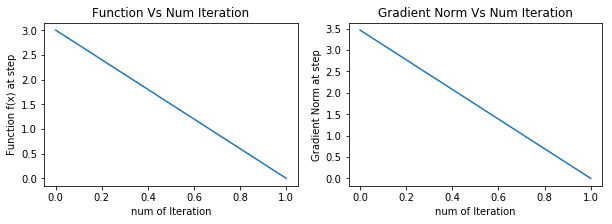

In [17]:
x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')
f = pow(x1,2) + pow(x2,2) + pow(x3,2)
deriv_1 = np.array([f.diff(x1), f.diff(x2), f.diff(x3)])
H = np.array([d_eq.diff(xn) for d_eq in deriv_1 for xn in [x1,x2,x3]]).reshape(3,3)
print(deriv_1)
print (H)

xk = np.array([1,1,1])

# fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=3, numSteps=10, should_print=1)

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, numFeatures=3, 
                                                                 numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([fx_array, gradientNorm_arr])

outData

# Solution d(2)

#######################&&&&&&&&&&&&  [[ 2. -2.]
 [-2.  4.]]

##########################################################
Function F at x: f(x)  0.e-125
Gradient at xk0 is:  [  1.18182126e-125  -2.00000000e+000]
####### Gradient Norm:  2.0
The updated Value xk1 is 
 [0 0]
#######################&&&&&&&&&&&&  [[ 2. -2.]
 [-2.  4.]]

##########################################################
Function F at x: f(x)  -1.00000000000000
Gradient at xk1 is:  [  4.72728505e-125   9.45457010e-125]
####### Gradient Norm:  1.0570530726e-124
The updated Value xk2 is 
 [ 1.  1.]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


,pk,xk
0,"[-1.18182126308e-125, 2.0]","[1.0, 1.0]"


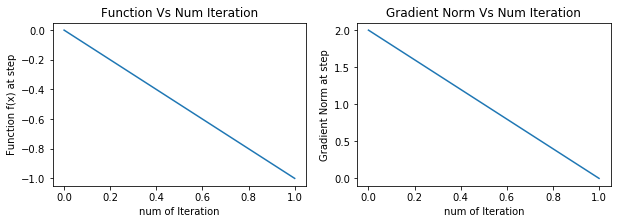

In [47]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1,2) + 2*pow(x2,2) - 2*x1*x2 - 2*x2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print (H)
xk = np.array([0,0])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([fx_array, gradientNorm_arr])

outData

# Solution d(3)

#######################&&&&&&&&&&&&  [[ 1330.   480.]
 [  480.   200.]]

##########################################################
Function F at x: f(x)  24.2000000000000
Gradient at xk0 is:  [-215.6  -88. ]
####### Gradient Norm:  232.867687754
The updated Value xk1 is 
 [-1.2  1. ]
#######################&&&&&&&&&&&&  [[ 1107.27258301   470.11236572]
 [  470.11236572   200.        ]]

##########################################################
Function F at x: f(x)  4.73188432737149
Gradient at xk1 is:  [-4.63782875 -0.12221204]
####### Gradient Norm:  4.63943868252
The updated Value xk2 is 
 [-1.1752809   1.38067413]
#######################&&&&&&&&&&&&  [[ 1970.85693359  -305.25030518]
 [ -305.25030518   200.        ]]

##########################################################
Function F at x: f(x)  1411.87704231355
Gradient at xk2 is:  [ 1146.48001431  -751.48411371]
####### Gradient Norm:  1370.81902393
The updated Value xk3 is 
 [ 0.76312575 -3.17505965]
#######################&

,pk,xk
0,"[215.6, 88.0]","[-1.17528089862, 1.38067413047]"
1,"[4.63782874913, 0.122212039784]","[0.763125754671, -3.17505965112]"
2,"[-1146.48001431, 751.484113712]","[0.763440546523, 0.582841214716]"
3,"[0.47304153722, 5.06717482906e-05]","[0.999987690665, 0.944020845064]"
4,"[-22.3815144428, 11.1909072834]","[0.99998866051, 0.999977434262]"


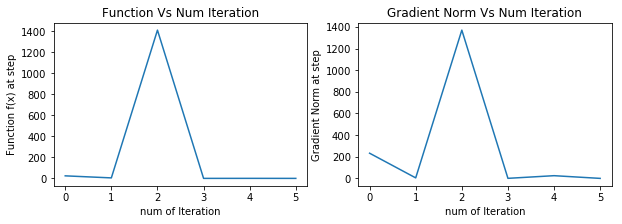

In [50]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (-x1 + 1)**2 + 100*(-x1**2 + x2)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(H)
xk = np.array([-1.2,1])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
outData["xk"] = xk1_arr

plot([fx_array, gradientNorm_arr])

outData

# Solution d(4)

In [21]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = x2**2 + (x1 + x2)**4
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1), deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
print (H)
xk = np.array([2,-2])

# fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=2, numSteps=20, should_print=2)

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=20, should_print=2)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([fx_array, gradientNorm_arr])

outData


[[12*(x1 + x2)**2 12*(x1 + x2)**2]
 [12*(x1 + x2)**2 12*(x1 + x2)**2 + 2]]
#######################&&&&&&&&&&&&  [[ 0.  0.]
 [ 0.  2.]]


LinAlgError: Singular matrix

# Solution d(5) :

### a)

#######################&&&&&&&&&&&&  [[ 17.  -8.]
 [ -8.  17.]]

##########################################################
Function F at x: f(x)  7.06250000000000
Gradient at xk0 is:  [  7. -11.]
####### Gradient Norm:  13.0384048104
The updated Value xk1 is 
 [ 1 -1]
#######################&&&&&&&&&&&&  [[ 10.61927891  -2.88173842]
 [ -2.88173842   6.06816816]]

##########################################################
Function F at x: f(x)  2.47525440662256
Gradient at xk1 is:  [ 2.02818312 -3.95180008]
####### Gradient Norm:  4.44187467562
The updated Value xk2 is 
 [ 0.86222223 -0.41777778]
#######################&&&&&&&&&&&&  [[ 9.78918362  1.52712011]
 [ 1.52712011  4.47299433]]

##########################################################
Function F at x: f(x)  0.889990409693384
Gradient at xk2 is:  [ 1.43882304 -1.08248999]
####### Gradient Norm:  1.80055444755
The updated Value xk3 is 
 [ 0.84584565  0.2256795 ]
#######################&&&&&&&&&&&&  [[ 7.22314548  2.78145027]
 

,pk,xk
0,"[-7.0, 11.0]","[0.862222231925, -0.417777784169]"
1,"[-2.02818312282, 3.95180007771]","[0.845845649748, 0.225679495304]"
2,"[-1.43882303714, 1.08248999366]","[0.650719235052, 0.534303062322]"
3,"[-0.495938483653, -0.049405493715]","[0.571261369019, 0.562344999299]"
4,"[-0.0395663538309, -0.00773236563101]","[0.564139612719, 0.564077798469]"
5,"[-0.000297502326667, -7.8324508182e-05]","[0.564086952133, 0.56408694871]"


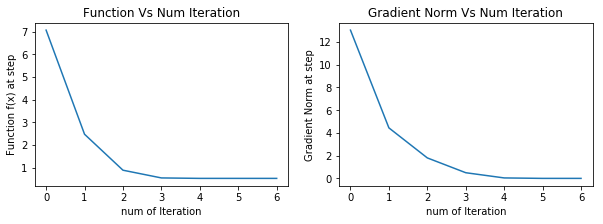

In [22]:
c = 1
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1-1)**2 + (x2-1)**2 + (x1**2 + x2**2 -0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)], 
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(deriv_2)
xk = np.array([1,-1])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([fx_array, gradientNorm_arr])

outData

### b)

#######################&&&&&&&&&&&&  [[ 152.  -80.]
 [ -80.  152.]]

##########################################################
Function F at x: f(x)  34.6250000000000
Gradient at xk0 is:  [ 70. -74.]
####### Gradient Norm:  101.862652626
The updated Value xk1 is 
 [ 1 -1]
#######################&&&&&&&&&&&&  [[ 71.28847504 -37.98821259]
 [-37.98821259  65.15820312]]

##########################################################
Function F at x: f(x)  7.78084272905723
Gradient at xk1 is:  [ 19.60310359 -21.93023313]
####### Gradient Norm:  29.4145677378
The updated Value xk2 is 
 [ 0.71743295 -0.6618774 ]
#######################&&&&&&&&&&&&  [[ 38.78690338 -18.80505371]
 [-18.80505371  25.19475937]]

##########################################################
Function F at x: f(x)  2.77929623154058
Gradient at xk2 is:  [ 4.94174599 -6.87243954]
####### Gradient Norm:  8.4647078306
The updated Value xk3 is 
 [ 0.57869992 -0.40619181]
#######################&&&&&&&&&&&&  [[ 33.9005928   -5.9

,pk,xk
0,"[-70.0, 74.0]","[0.717432950623, -0.661877396517]"
1,"[-19.6031035865, 21.9302331264]","[0.578699921586, -0.406191811283]"
2,"[-4.94174599299, 6.87243953763]","[0.58628573708, -0.127757277583]"
3,"[-1.75346900428, 2.81791684694]","[0.601237083084, 0.249455677041]"
4,"[-3.38021007757, -0.232270738589]","[0.485723846961, 0.332297418227]"
5,"[-0.843412433334, 0.0547411528935]","[0.419074497482, 0.394617816029]"
6,"[-0.201761340398, -0.0732692081852]","[0.403468484904, 0.402138113709]"
7,"[-0.00930340870485, -0.00267806006771]","[0.402612263762, 0.402608927042]"


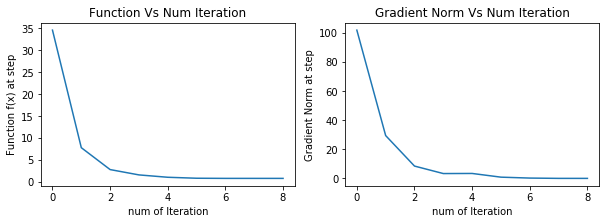

In [23]:
c = 10
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1 - 1)**2 + (x2 - 1)**2 + 10*(x1**2 + x2**2 - 0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)], 
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(deriv_2)
xk = np.array([1,-1])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([fx_array, gradientNorm_arr])

outData

### c)

#######################&&&&&&&&&&&&  [[ 1502.  -800.]
 [ -800.  1502.]]
#######################&&&&&&&&&&&&  [[ 678.12762451 -386.4666748 ]
 [-386.4666748   671.79101562]]

##########################################################
Function F at x: f(x)  54.2489276164903
Gradient at xk1 is:  [ 199.32904121 -201.68528243]
####### Gradient Norm:  283.564842351
The updated Value xk2 is 
 [ 0.69789682 -0.69219881]
#######################&&&&&&&&&&&&  [[ 319.28552246 -204.86579895]
 [-204.86579895  304.69696045]]
#######################&&&&&&&&&&&&  [[ 177.07374573 -128.18035889]
 [-128.18035889  143.91801453]]

##########################################################
Function F at x: f(x)  2.75444715336164
Gradient at xk3 is:  [ 11.34115843 -13.72683031]
####### Gradient Norm:  17.8058345761
The updated Value xk4 is 
 [ 0.42694526 -0.37528335]
#######################&&&&&&&&&&&&  [[ 163.98132324  -94.33308411]
 [ -94.33308411   65.58520508]]
#######################&&&&&&&&&&&&  [[ 329.29

,pk,xk
0,"[-700.0, 704.0]","[0.697896818398, -0.692198812729]"
1,"[-199.329041206, 201.685282432]","[0.515133357026, -0.497118368486]"
2,"[-53.1170124658, 55.1894876135]","[0.42694525669, -0.375283346249]"
3,"[-11.3411584291, 13.7268303129]","[0.441006932582, -0.267379820564]"
4,"[-1.70076842213, 4.24375338244]","[0.596598700952, 0.0211182350454]"
5,"[-24.5787083397, 1.05917426735]","[0.520714913237, 0.0617359899405]"
6,"[-4.2392796823, 1.26027064347]","[0.486125116682, 0.204760631753]"
7,"[-4.46440340175, -0.722869646156]","[0.437813678859, 0.271461800315]"
8,"[-1.56771327183, -0.212123363308]","[0.390481239838, 0.335367859542]"
9,"[-1.11560293601, -0.675859890906]","[0.368556575804, 0.351916621841]"


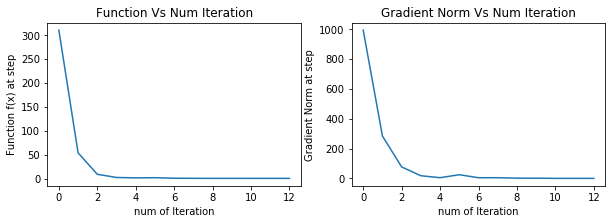

In [24]:
c = 10
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1 - 1)**2 + (x2 - 1)**2 + 100*(x1**2 + x2**2 - 0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)], 
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(deriv_2)
xk = np.array([1,-1])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=20, should_print=2)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([fx_array, gradientNorm_arr])

outData